# DSCI 512 Lecture 5: Graphs


Outline:

- Graphs intro
- Graph types
- Stacks and queues 
- Graph searches: BFS and DFS
- Centrality, PageRank
- Other graph properties 
- True/False questions

## Graphs intro

Many relationships are NOT hierarchical:
- friendships (on Facebook, Twitter, or in real life)
- connections between machines on the internet
- direct flight connections between airports
- prerequisite relationships of MDS courses
- etc.



A graph consists of: 

- A set of _vertices_ or _nodes_
- A set of pairs of vertices, called _edges_

In [4]:
import networkx as nx

G = nx.Graph()

G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")

G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "D")
G.add_edge("D", "E")
G.add_edge("E", "A")
G.add_edge("A", "C")
G.add_edge("B", "D")
G.add_edge("C", "E")

- The graph package we're using, `networkx`, randomly visualizes the graph each time.
    - By re-running the next cell, we can see a few equivalent representations.
    - They are all the same graph!
    - See [`networkx.draw` documentation](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html).

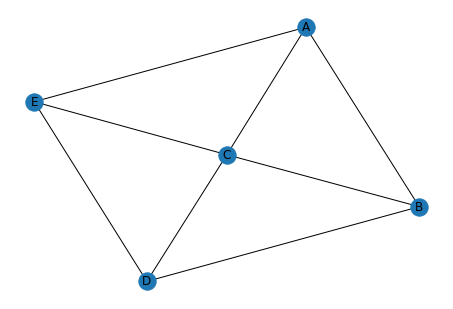

In [6]:
nx.draw(G, with_labels=True)

Note: we can set the random seed if we want a fixed drawing:

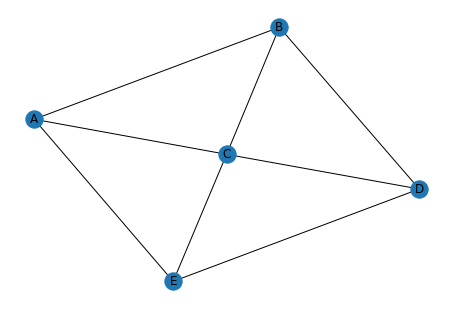

In [7]:
nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=5))

Some graph terminology:

- The **degree** of a vertex is the number of edges connected to it.
  - Above, "B" has degree 3 and "C" has degree 4.
- A graph is _complete_ if every pair of vertices is joined by an edge.
  - Below is an example with 4 vertices.

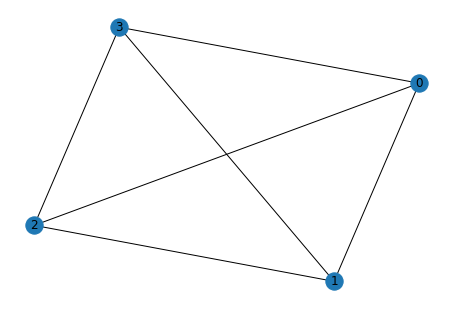

In [8]:
complete = nx.complete_graph(4)

nx.draw(complete, with_labels=True)

- Above, we are representing the graphs by edge lists or adjacency lists.
- Next lecture we'll talk about another representation, adjacency matrices.


Finally, note that graphs do not need to be connected!

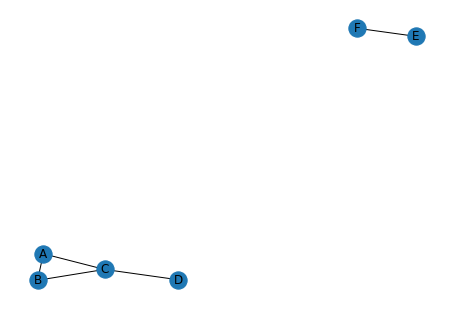

In [10]:
disconnected = nx.Graph()

disconnected.add_node("A")
disconnected.add_node("B")
disconnected.add_node("C")
disconnected.add_node("D")
disconnected.add_node("E")
disconnected.add_node("F")

disconnected.add_edge("A", "B")
disconnected.add_edge("A", "C")
disconnected.add_edge("D", "C")
disconnected.add_edge("B", "C")

disconnected.add_edge("E", "F")

nx.draw(disconnected, with_labels=True)

## Graph types

#### Undirected graphs

- This is what've been looking at so far.
- Saying "there is an edge from A to B" is the same as saying "there is an edge from B to A"
- You can try this out in `networkx`.

#### Directed graphs

- Sometimes, relationships are directed (e.g. Twitter).
- This gives us a directed graph. We typically draw the direction with an arrow.
- Example:


In [11]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("A", "C")

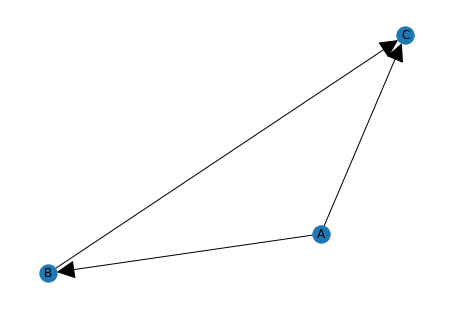

In [12]:
nx.draw(G, with_labels=True, arrowsize=40)

Here, if we swap the last line's direction:

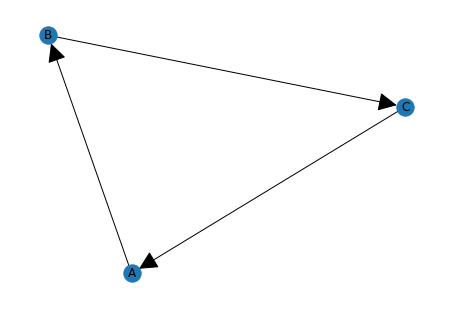

In [13]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "A")

nx.draw(G, with_labels=True, arrowsize=40)

- This is a fundamentally different graph. 
- This one is a loop, the first one was not.
- The choice of graph type depends on the situation you're modelling. 
  - The MDS(-CL) prerequisite graph is directed.

![](mds.png)

- Note that this is a directed graph, NOT a tree, because nodes can have multiple parents.

Exercise: draw a directed graph with 5 nodes that is also a valid binary tree

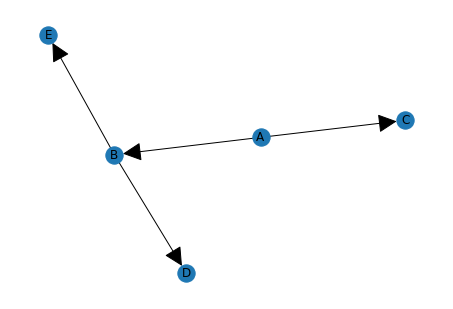

In [14]:
#my code here

G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")

G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("B", "D")
G.add_edge("B", "E")

nx.draw(G, with_labels=True, arrowsize=40)
#my code here

- directed graphs can also have reciprocal connections:

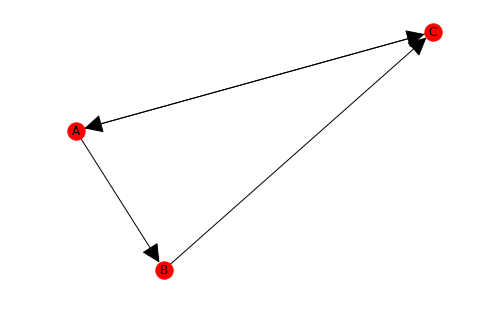

In [58]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A", "B")
G.add_edge("B", "C")

# add a 2-way edge
G.add_edge("C", "A")
G.add_edge("A", "C")

nx.draw(G, with_labels=True, arrowsize=40)

- Here, we have a double-headed arrow between A and C. 
- In an undirected graph, it wouldn't have made sense to have both 

```python
G.add_edge("C", "A")
G.add_edge("A", "C")
```

because one would be sufficient.

- Directed graphs also can have self-connections.
  - `networkx` supports them but it doesn't draw them properly.
  - These are important for certain kinds of models we'll see later

#### Unweighted graphs

All the graphs above are "unweighted" because all edges are equal.

#### Weighted graphs

Both undirected and directed graphs can have weighted edges.

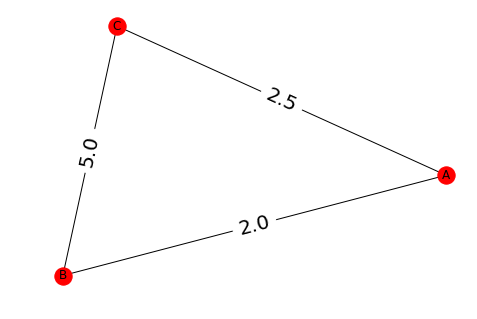

In [59]:
G = nx.Graph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A", "B", weight=2.0)
G.add_edge("B", "C", weight=5.0)
G.add_edge("C", "A", weight=2.5)

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrowsize=40)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=20);

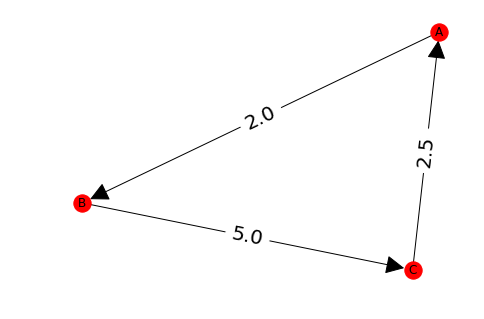

In [60]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A", "B", weight=2.0)
G.add_edge("B", "C", weight=5.0)
G.add_edge("C", "A", weight=2.5)

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrowsize=40)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=20);

Examples:

- Flights: weights can be cost or flight time between destinations.
  - Now we definitely want a directed graph, as the cost/time may depend on the direction.
  - Interesting problem: minimum cost path from $A$ to $B$ (we will look at this next week)
- Countries
  - Edge weights could be number of dual citizens (undirected)
  - Or trade/immigration in each direction (directed)
- People
  - Edge weights reflect intensity of relationship (undirected or undirected)

## Stacks and queues

- Let's briefly discuss some data structures we'll need shortly.
- We want a data structure that we can put things into, and then retrieve them later.
- A [stack](https://en.wikipedia.org/wiki/Stack_(abstract_data_type%29) does with with the "last in, first out" (LIFO) mentality - like a stack of books or plates.

In [7]:
class Stack:
    
    def __init__(self):
        self.data = []
    
    # my code here
    
    def push(self, item):
        self.data.append(item)
        
    def pop(self):
        return self.data.pop()

    # my code here
    
    def isEmpty(self):
        return len(self.data) == 0

In [62]:
s = Stack()

s.push("first")
s.push("second")

s.pop()

'second'

In [63]:
s.push("third")
s.push("fourth")

In [64]:
s.pop()

'fourth'

In [65]:
s.pop()

'third'

In [66]:
s.pop()

'first'

In [67]:
s.pop()

IndexError: pop from empty list

- Along with stacks we also have [queues](https://en.wikipedia.org/wiki/Queue_(abstract_data_type%29), which use "first in, first out" (FIFO) ordering.
  - e.g. an actual queue/lineup

In [8]:
class Queue:
    def __init__(self):
        self.data = []
        
    # my code here
        
    def push(self, item):
        self.data.append(item)
        
    def pop(self):
        return self.data.pop(0)
    
    # my code here
    
    def isEmpty(self):
        return len(self.data) == 0

In [5]:
q = Queue()

q.push("first")
q.push("second")

q.pop()

'first'

In [70]:
q.push("third")
q.push("fourth")

In [71]:
while not q.isEmpty():
    print(q.pop())

second
third
fourth


## Graph searches

In [5]:
# pappus = nx.pappus_graph()
# nx.draw(pappus, with_labels=True, arrowsize=40)

erg = nx.erdos_renyi_graph(15, 0.2, seed=40)
nx.draw(erg, with_labels=True, pos=nx.spring_layout(erg, seed=5))

- Question: are nodes $0$ and $14$ connected?
  - We can see this easily with our eyes.
  - But imagine a dataset with millions of nodes and billions of edges, like a Facebook social network (see lab).
  - We can't "eyeball" if two people are connected; we need an algorithm.

- Approach: visit all neighbours of node $0$ (using `neighbors` method), then all neighbours of these neighbours, etc.
  - Keep track of which nodes have already been visited so we don't get stuck in an infinite cycle.

In [236]:
def connected(g, node1, node2, visited=None, verbose=False):
    """ 
    Check whether node1 and node2 are connected in the graph g.
    
    Arguments
    g -- (networkx.classes.graph.Graph) the graph
    node1 -- (key) first node
    node2 -- (key) second node
    """
    
    if verbose:
        print("At node", node1)
    
    if visited is None: 
        visited = {node1} # initialize 
    
    #my code here
    
    if node1 == node2:
        return True
    
    for v in g.neighbors(node1):
        
        if v in visited:
            continue
            
        visited.add(v)
        
        # If a connection found, passes the True value all the way up to the top level.
        if connected(g, v, node2, visited, verbose):
            return True
            
    return False

    #my code here

In [237]:
connected(erg, 0, 14)

True

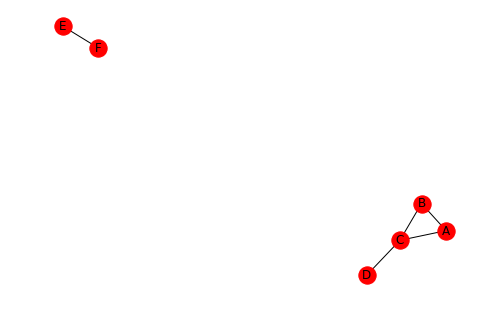

In [238]:
nx.draw(disconnected, with_labels=True)

In [239]:
assert connected(disconnected, "A", "B")
assert connected(disconnected, "A", "C")
assert connected(disconnected, "A", "D")
assert connected(disconnected, "B", "C")
assert connected(disconnected, "B", "D")
assert connected(disconnected, "E", "F")
assert not connected(disconnected, "A", "E")
assert not connected(disconnected, "A", "F")
assert not connected(disconnected, "D", "E")
assert not connected(disconnected, "D", "F")
assert not connected(disconnected, "C", "E")

- Question: in what order were the nodes traversed?

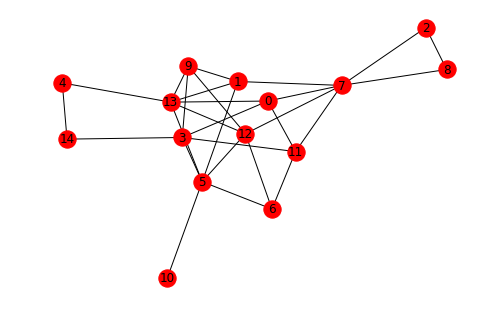

In [240]:
nx.draw(erg, with_labels=True, pos=nx.spring_layout(erg, seed=5))

In [241]:
connected(erg, 0, 14, verbose=True)

At node 3
At node 5
At node 1
At node 7
At node 2
At node 8
At node 11
At node 6
At node 12
At node 9
At node 13
At node 4
At node 14


True

- Note the order: 
  - It's taking 0's first neighbour, which is 3
  - Then 3's first neighbour, which is 5
  - Then 5's first neighbour, which is 1
  - This is called [depth first search](https://en.wikipedia.org/wiki/Depth-first_search) (DFS) because we go deep into the graph
- What if this was a huge graph, and the two nodes were right next to each other?
  - The algorithm might be extremely inefficient

- Implementation:
  - Let's implement it non-recursively this time.
  - Every time we visit a node, we add its neighbours to the queue.
  - This ensures we'll visit the all the "distance 1 neighbours" before visiting any "distance 2 neighbours".

In [246]:
def connected_bfs(g, node1, node2, verbose=False):
    """ 
    Given a NetworkX Graph g, and start node node1 
    and goal node node2, distance_BFS returns the
    degree of separation between node1 and node2. 
    If they are not connected, returns -1.
    
    Arguments
    g -- (networkx.classes.graph.Graph) the graph
    node1 -- (str) first node
    node2 -- (str) second node
    """
    
    q = Queue()
    q.push(node1)

    visited = set() 

    while not q.isEmpty():
        #my code here
        vertex = q.pop()
        if vertex == node2:
            return True
        
        if vertex in visited:
            continue
            
        visited.add(vertex)
        
        for v in g.neighbors(vertex):            
            q.push(v)

        #my code here
        
        if verbose:
            print("At node", vertex)
            
    return False

In [247]:
connected_bfs(erg, 0, 14)

True

In [248]:
connected_bfs(erg, 0, 14, verbose=True)

At node 0
At node 3
At node 7
At node 11
At node 13
At node 5
At node 9


True

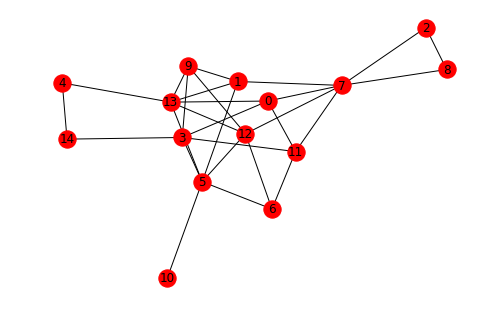

In [233]:
nx.draw(erg, with_labels=True, pos=nx.spring_layout(erg, seed=5))

- The beauty is that to turn this into DFS, we only need to change the `Queue` to a `Stack`.

Exercise: create a version of connected_bfs which allows you to use either a Queue or a Stack (passed in as an argument) and which returns the number of nodes that are visited as part of the search. Then, use the provided `check_all` function to compare each kind of search on all pairings of nodes in the graph and see which involves less steps.

In [1]:
# my code here
def connected_bfs(g, node1, node2, m):
    
    m.push(node1)

    visited = set()

    while not m.isEmpty():
        vertex = m.pop()
        if vertex == node2:
            return len(visited)
        
        if vertex in visited:
            continue
            
        visited.add(vertex)
        
        for v in g.neighbors(vertex):            
            m.push(v)
            
    return len(visited)

# my code here

def check_all(g,container):
    total_steps = 0
    for node1 in g.nodes():
        for node2 in g.nodes():
            m = container()
            total_steps += connected_bfs(g, node1, node2, m)
    print(total_steps)

In [9]:
check_all(erg,Queue)
check_all(erg,Stack)

1575
1575


Some very similar algorihtms can be used to determine the "distance" between nodes:

In [253]:
nx.shortest_path_length(erg, 0, 14)

2

- This means it takes $2$ hops to get from node $0$ to node $14$.
- As an optional question in lab you are asked to implement this, by extending the above code to keep track of the number of hops.

## Centrality, PageRank

- We'll focus on one more interesting graph problem, [PageRank](https://en.wikipedia.org/wiki/PageRank).
- This is the algorithm that made Google the best search engine.
- Let websites be nodes in a graph.
- Put a directed edge from site $A$ to $B$ if site $A$ links to site $B$.

In [281]:
sfg = nx.scale_free_graph(10, seed=25)

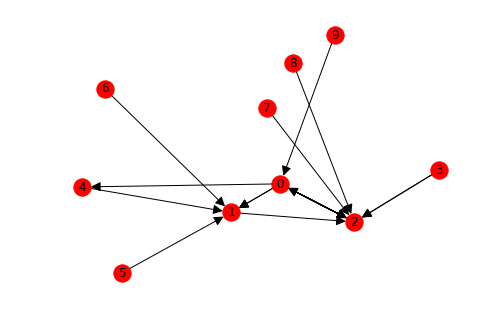

In [282]:
nx.draw(sfg, with_labels=True, arrowsize=20, pos=nx.spring_layout(sfg, seed=25))

Which is the most "important" webpage here? Perhaps $1$ or $2$? This is a question known as [centrality](https://en.wikipedia.org/wiki/Centrality). See also the idea of a [hub](https://en.wikipedia.org/wiki/Hub_(network_science%29).

- PageRank is mathematically beautiful and is essentially a linear algebra problem
- That is beyond the scope here
- But we can approximate the PageRank with Monte Carlo as follows:
  1. We start at some random node
  2. With probability $\alpha$ choose a completely random node in the graph (this emulates the user going to a random new page); with probability $(1−\alpha)$ choose a random neighbour of the current node (this emulates the user clicking on a link on the page). 
  3. Repeat Step 2 $n$ times.
  4. The ranking of each node is proportional to the number of times this random walk visits the node.

To repeat, this is NOT how Google computes PageRank; there is a more elegant/efficient way (finding the eigenvector of the transition matrix)

In [306]:
from collections import Counter

def pageRank(G, alpha = 0.1, Niter = 100000):
    """
    Compute the PageRank for all nodes in the directed graph G.
    Returns a dictionary of the PageRank for all nodes.
    
    Arguments:
    G -- (networkx.classes.graph.DiGraph) the graph
    alpha -- (float) the probability of surfing to a random page
    Nitem -- (int) the number of iterations of simulation to perform
    """
    
    visited = Counter()

    nodes = G.nodes()
    current_node = np.random.choice(nodes)
    for i in range(Niter):
        if np.random.random() < alpha:
            current_node = np.random.choice(nodes)
        else:
            current_node = np.random.choice(list(G.neighbors(current_node)))
        visited[current_node] += 1

    return visited

In [307]:
pr = pageRank(sfg)

In [308]:
pr.most_common()

[(2, 43556),
 (0, 27540),
 (1, 15532),
 (4, 7369),
 (6, 1046),
 (9, 1037),
 (3, 1004),
 (7, 983),
 (8, 970),
 (5, 963)]

- Question: Aha, why is node $0$ above node $1$? 


- Answer: because node $2$ only links there, and node $2$ has a very high PageRank.
- So, a link from a popular page is more valuable than a link from a no-name page. Makes sense!
- We can just sort the pages by number of incoming links, and we see we get a different (worse) ranking:

In [323]:
num_neigh = {i : len(list(nx.reverse_view(sfg).neighbors(i))) for i in sfg.nodes()}
for node in sorted(num_neigh, key=num_neigh.get, reverse=True):
    print("Node", node, "has", num_neigh[node], "incoming links")

Node 2 has 6 incoming links
Node 1 has 4 incoming links
Node 0 has 3 incoming links
Node 4 has 1 incoming links
Node 3 has 0 incoming links
Node 5 has 0 incoming links
Node 6 has 0 incoming links
Node 7 has 0 incoming links
Node 8 has 0 incoming links
Node 9 has 0 incoming links


Here, indeed, we get node $1$ above node $0$.

## Other graph properties

There are a lot of standard problems in graph theory, such as:

- Find the largest [clique](https://en.wikipedia.org/wiki/Clique_(graph_theory%29) in a graph.
- Find the largest [independent set](https://en.wikipedia.org/wiki/Independent_set_(graph_theory%29) in a graph.
- Find the [vertex cover](https://en.wikipedia.org/wiki/Vertex_cover) of a graph with the smallest number of vertices.
- Find the smallest [dominating set](https://en.wikipedia.org/wiki/Dominating_set) in a graph.
- [Colour](https://en.wikipedia.org/wiki/Graph_coloring) a graph with the smallest number of colours.

It turns out a lot of real-world problems can be mapped to these problems, and thus solving these problems is important. 

- HOWEVER, they are [NP-Complete](https://www.geeksforgeeks.org/np-completeness-set-1/).
  - You may have heard this term.
  - We aren't going into this here
  - But, in short, we don't have fast algorithms to solve these problems. 

## T/F questions


1. In an undirected graph, if there is a path from $A$ to $B$ then there is a path from $B$ to $A$.
2. In an directed graph, if there is a path from $A$ to $B$ then there is a path from $B$ to $A$.
3. The number of edges in a graph must be less than or equal to the number of nodes. 
4. DFS can be naturally implemented with a stack, and BFS with a queue.
5. For the purpose of finding whether two nodes are connected, BFS is faster than DFS.
6. PageRank models websites as nodes and links as directed edges. 